In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
base_model = VGG19(include_top=False,weights="imagenet",input_shape= (32,32,3))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128,activation=("relu")))
model.add(Dense(10,activation=("softmax")))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,091,338
Trainable params: 66,954
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])


Epoch 1/50
782/782 [==============================] - 16s 18ms/step - loss: 1.4550 - accuracy: 0.4879 - val_loss: 1.3153 - val_accuracy: 0.5442 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 1.2594 - accuracy: 0.5581 - val_loss: 1.2631 - val_accuracy: 0.5542 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 1.2005 - accuracy: 0.5783 - val_loss: 1.2219 - val_accuracy: 0.5739 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1643 - accuracy: 0.5929 - val_loss: 1.2022 - val_accuracy: 0.5823 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 1.1347 - accuracy: 0.6019 - val_loss: 1.1863 - val_accuracy: 0.5853 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1080 - accuracy: 0.6121 - val_loss: 1.1881 - val_accuracy: 0.5802 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 13s 

In [ ]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

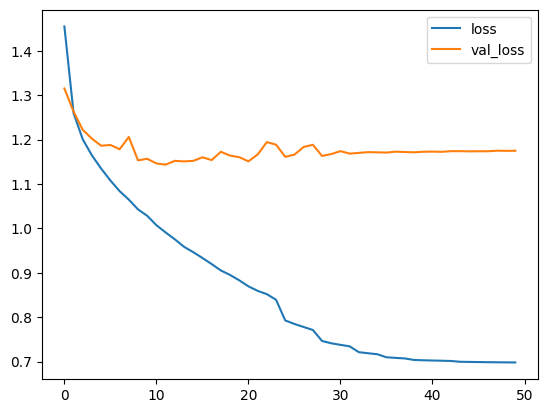

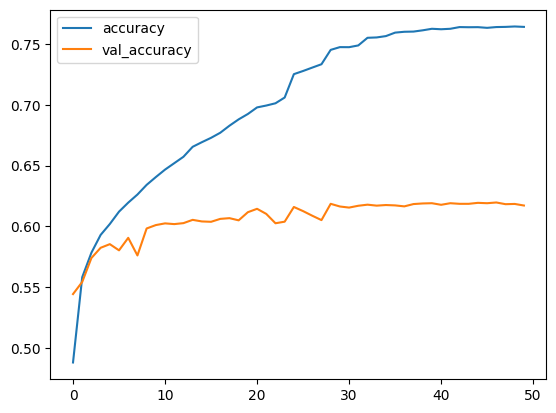

In [ ]:
metrics[['loss','val_loss']].plot()
     

metrics[['accuracy','val_accuracy']].plot()
     

In [ ]:
pred=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
metrics.confusion_matrix(y_test,pred)

array([[701,  21,  50,  20,  23,  12,  15,  16, 102,  40],
       [ 23, 676,  13,  31,  12,  18,  26,  13,  55, 133],
       [ 60,  19, 522,  76,  88,  66,  93,  31,  27,  18],
       [ 22,  40,  67, 450,  48, 152,  89,  52,  30,  50],
       [ 27,  12,  75,  71, 546,  50,  95,  83,  27,  14],
       [ 14,  24,  49, 182,  50, 523,  59,  65,  10,  24],
       [  8,  18,  65,  59,  68,  42, 697,  15,  14,  14],
       [ 11,  14,  46,  47,  85,  75,  25, 645,  12,  40],
       [ 77,  56,  20,  27,  11,   6,   9,   7, 738,  49],
       [ 44, 118,  13,  31,   9,  21,  18,  28,  45, 673]])

In [ ]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.68      0.68      0.68      1000
           2       0.57      0.52      0.54      1000
           3       0.45      0.45      0.45      1000
           4       0.58      0.55      0.56      1000
           5       0.54      0.52      0.53      1000
           6       0.62      0.70      0.66      1000
           7       0.68      0.65      0.66      1000
           8       0.70      0.74      0.72      1000
           9       0.64      0.67      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

